<a href="https://colab.research.google.com/github/sachinkumarjangi/taco-sales/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd

# Replace '/content/drive/My Drive/path/to/your/sales_data.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/sales_data.csv'
try:
    Data = pd.read_csv(file_path)
    print("Data loaded successfully!")
    display(Data.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please update the 'file_path' variable with the correct path to your CSV file in Google Drive.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Data loaded successfully!


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [30]:
data_dropped=Data.dropna()
data_filled = Data.fillna({'Category':'unknown','Store ID':'unknown','Product ID':'unknown','Region':'unknown','Weather Condition':'unknown','Seasonality':'unknown'})

In [ ]:
average = Data['Price'].mean()
Data['Price'] = Data['Price'].fillna(average)

In [29]:
total_sales=Data['Units Sold'].sum()
print(f"Total sales: {total_sales}")

Total sales: 6750876


In [28]:
total_price=Data['Price'].sum()
print(f"Total price: {total_price}")

Total price: 5147178.09


In [ ]:
total_units_ordered = Data['Units Ordered'].sum()
print(f"Total units ordered: {total_units_ordered}")

In [ ]:
toatl_Demand=Data['Demand'].sum()
print(f"Total demand: {toatl_Demand}")

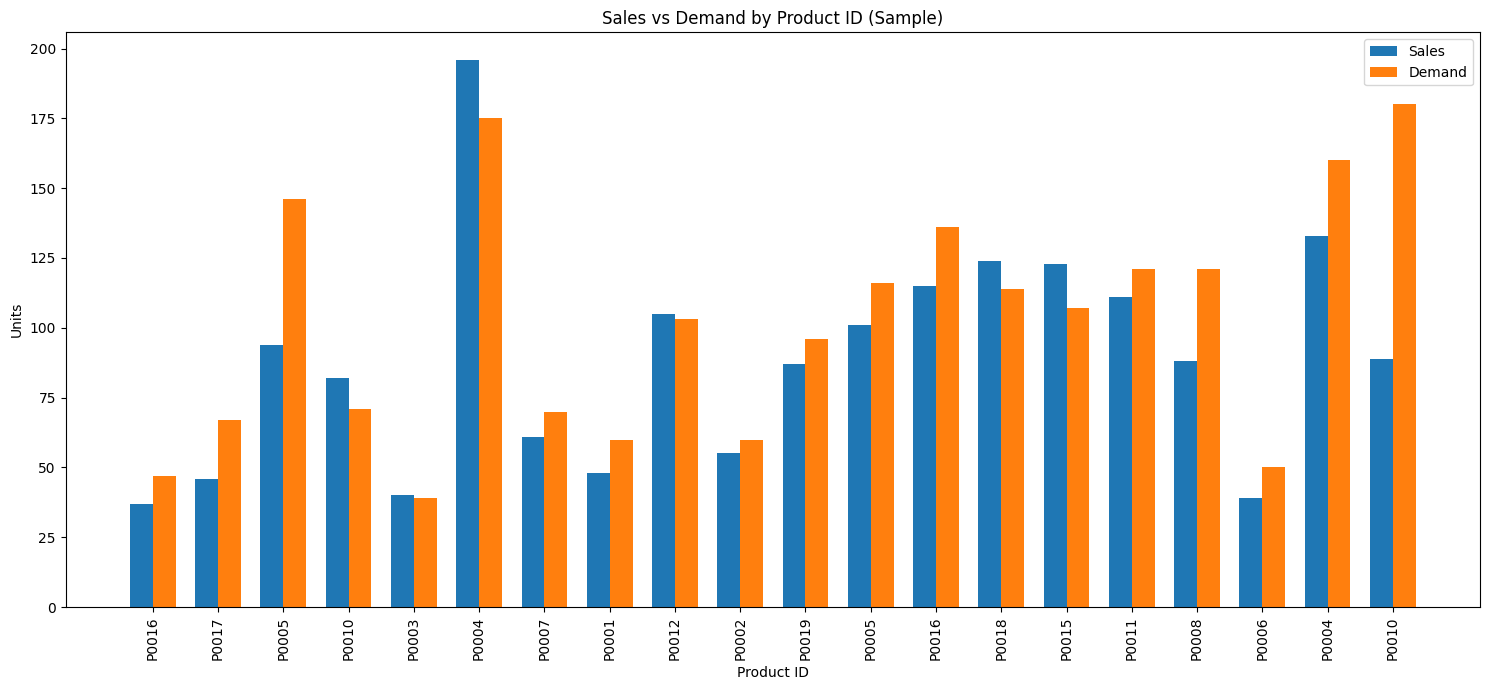

In [34]:
products =Data['Product ID']
sales = Data['Units Sold']
demand = Data['Demand']

# Create a smaller sample for plotting to avoid overcrowding the chart
num_samples = 20
sample_indices = np.random.choice(len(products), num_samples, replace=False)
products_sample = products[sample_indices]
sales_sample = sales[sample_indices]
demand_sample = demand[sample_indices]

x = np.arange(num_samples)
width = 0.35

plt.figure(figsize=(15, 7)) # Increase figure size for better readability
plt.bar(x - width/2, sales_sample, width, label='Sales')
plt.bar(x + width/2, demand_sample, width, label='Demand')

plt.xlabel('Product ID')
plt.ylabel('Units')
plt.title('Sales vs Demand by Product ID (Sample)')
plt.xticks(x, products_sample, rotation=90) # Set x-axis ticks to product IDs and rotate for readability
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

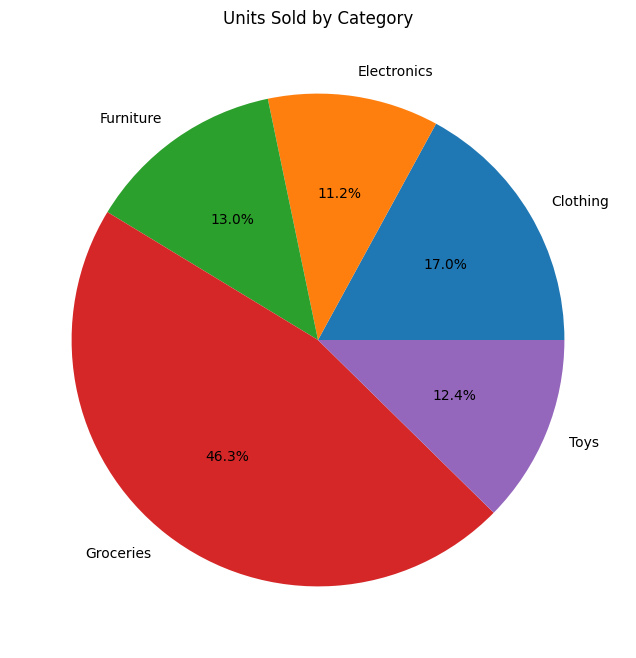

In [35]:
category_sales = Data.groupby('Category')['Units Sold'].sum()
plt.figure(figsize=(8, 8)) # Adjust figure size
category_sales.plot(kind='pie', autopct='%1.1f%%') # Use kind='pie' and autopct for percentages
plt.title('Units Sold by Category') # Correct title
plt.ylabel('') # Remove default y-label
plt.show()